In [ ]:
source= '/content/drive/My Drive/dl project 2/images'
dest = '/content/drive/My Drive/dl project 2/data'

In [ ]:
import os
length = len(os.listdir(source))
tomake=[dest + '/training', dest + '/testing']
for i in os.listdir(source):
  tomake.append(dest + f'/training/{i}')
  
  tomake.append(dest + f'/testing/{i}')
len(tomake)

In [ ]:
for directory in tomake:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

In [ ]:
import random
from shutil import copyfile
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

In [ ]:
classes=[]
for i in os.listdir(dest + '/training'):
    classes.append(i)
classes = sorted(classes)
len(classes)

3

In [ ]:
source_dir=[]
train_dir=[]
test_dir=[]
for i in classes:
 
  source_dir.append(source + '/' + i + '/')
  train_dir.append(dest + '/training/'+i+'/')
  test_dir.append(dest + '/testing/'+i+'/')

print(len(source_dir))
print(len(train_dir))
print(len(test_dir))

3
3
3


In [ ]:
for i in range(0,3):
  split_size = .8
  split_data(source_dir[i], train_dir[i], test_dir[i], split_size)

###Model : CNN

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
import numpy as np
np.random.seed(42)
data = ImageDataBunch.from_folder(dest, train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

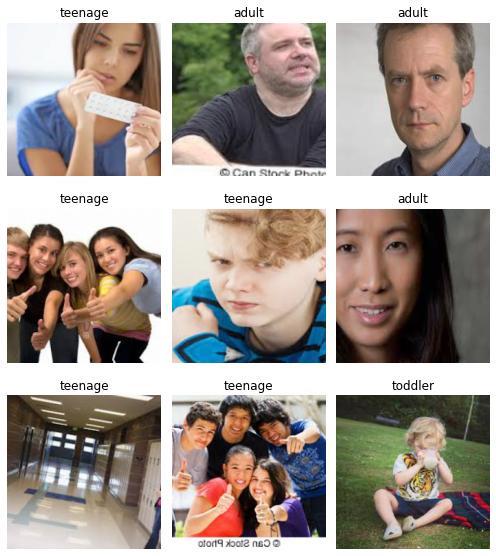

In [ ]:
data.show_batch(rows=3, figsize=(7, 8))

In [ ]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.149541,0.725665,0.771574,02:21
1,0.856501,0.518341,0.842640,00:24
2,0.702910,0.422578,0.847716,00:24
3,0.569509,0.454648,0.873096,00:25
4,0.469980,0.442369,0.862944,00:24


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

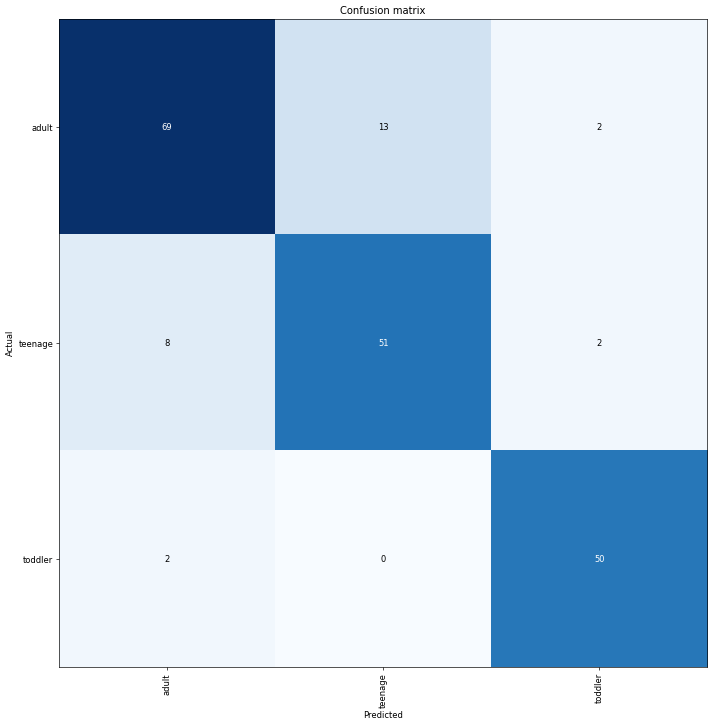

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

###Fine parameter tuning

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.10E-03


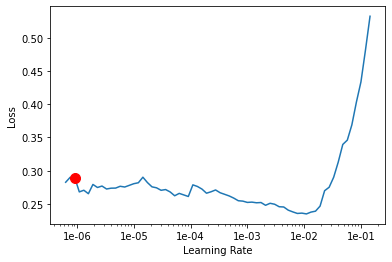

In [ ]:
learn.lr_find()
fig = learn.recorder.plot(suggestion=True, return_fig=True);
lr = learn.recorder.min_grad_lr 

In [ ]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.153280,0.361846,0.888325,00:25
1,0.141491,0.319630,0.908629,00:25
2,0.115154,0.309926,0.903553,00:25
3,0.107118,0.308166,0.903553,00:25


In [ ]:
learn.save('/content/drive/My Drive/dl project 2/model/saved-1')

In [ ]:
learn.export()

Predicting single image

In [ ]:
image_path="/content/drive/My Drive/dl project 2/data/testing/teenage/download (12).jpg"
cat, tensor, probs = learn.predict(open_image(image_path))
print(cat)
print(tensor)
print(probs)

teenage
tensor(1)
tensor([4.0190e-06, 1.0000e+00, 2.7230e-11])


In [ ]:
import cv2
import glob
ids=[]
predictions=[]
test_data = '/content/drive/My Drive/dl project 2/data/testing/Test Data/'
for img in glob.glob(test_data + "*.jpg"):
    #print(img)
    a=img.strip(test_data)
    print(a)
    cat, tensor, probs = learn.predict(open_image(img))
    print(cat.__str__())
    ids.append(a)
    
    predictions.append(cat.__str__())
    


Img1038.
teenage
Img1248.
teenage
Img1077.
teenage
Img1279.
teenage
Img1382.
teenage
Img5182.
toddler
Img3606.
teenage
Img1628.
teenage
Img1071.
teenage
Img1186.
teenage
Img3669.
teenage
Img5128.
toddler
Img1444.
teenage
Img5578.
toddler
Img5245.
teenage
Img3740.
teenage
Img1288.
teenage
Img1448.
teenage
Img3247.
teenage
Img2967.
teenage
Img2924.
toddler
Img1073.
teenage
Img7130.
teenage
Img2216.
teenage
Img1951.
teenage
Img4549.
teenage
Img2061.
teenage
Img1304.
adult
Img3211.
toddler
Img3931.
teenage
Img2055.
teenage
Img1766.
teenage
Img2618.
teenage
Img1989.
teenage
Img3629.
teenage
Img1093.
teenage
Img2307.
teenage
Img1451.
teenage
Img2391.
teenage
Img5694.
teenage
Img1439.
teenage
Img2813.
teenage
Img2454.
teenage
Img1851.
teenage
Img3942.
teenage
Img2085.
teenage
Img1369.
teenage
Img1546.
teenage
Img3731.
teenage
Img3353.
teenage
Img1541.
teenage
Img1981.
teenage
Img1792.
teenage
Img3907.
teenage
Img4163.
toddler
Img2365.
adult
Img3024.
teenage
Img1025.
teenage
Img7195.
teenage
I

In [ ]:
import pandas as pd 
f='submission.csv'
submission = pd.DataFrame({"Filename":ids,   
                    "Category":predictions}) 
submission.to_csv(f,index=False)